In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [84]:
train = pd.read_csv('titanic_train.csv')

In [88]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [122]:
maxfare = train['Fare'].max()
hfare = train['Fare'].mean() + train['Fare'].std()*3
maxfare

512.32920000000001

In [121]:
hvalpass = train[(train['Fare']>=hfare)&(train['Fare']<=maxfare)]
hvalpass[hvalpass['Sex']=='male']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


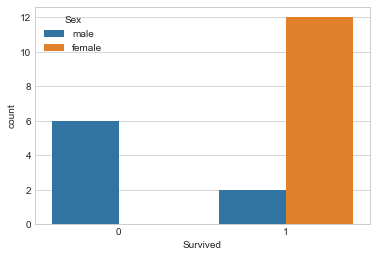

In [120]:
sns.countplot(x='Survived',data=train[(train['Fare']>=hfare)&(train['Fare']<=maxfare)],hue='Sex')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


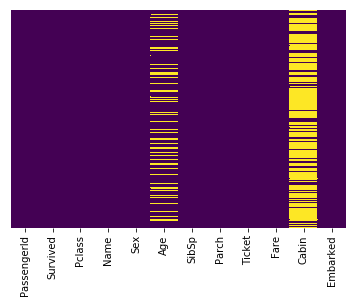

In [6]:
# Check for missing data using a heatmap
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
sns.set_style('whitegrid')

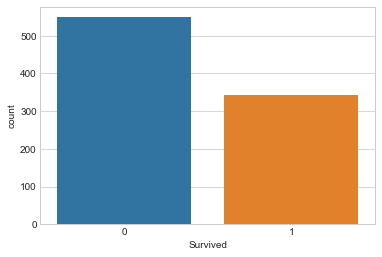

In [10]:
sns.countplot(x='Survived',data=train)

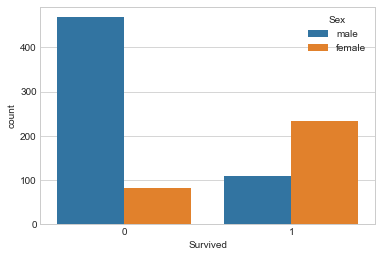

In [12]:
sns.countplot(x='Survived',data=train,hue='Sex')

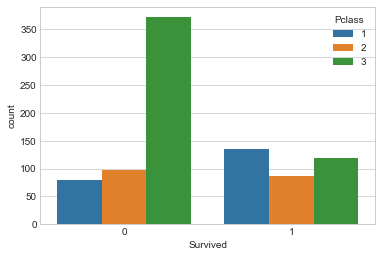

In [15]:
sns.countplot(x='Survived',data=train,hue='Pclass')

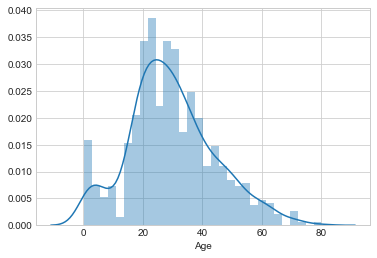

In [19]:
sns.distplot(train['Age'].dropna(),bins=30)

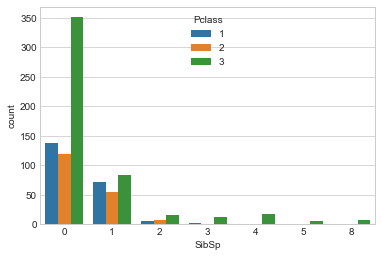

In [37]:
sns.countplot(x='SibSp',data=train,hue='Pclass')

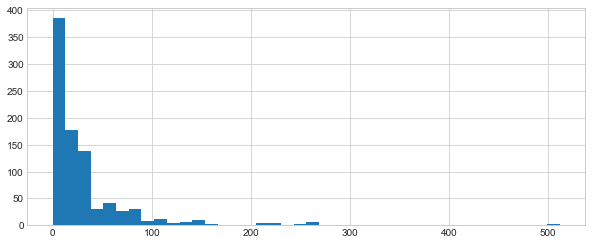

In [32]:
train['Fare'].hist(bins=40,figsize=(10,4))

# Cleaning up the data

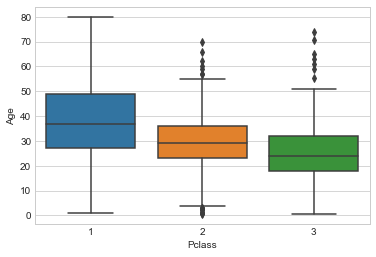

In [38]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [39]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

        

In [40]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

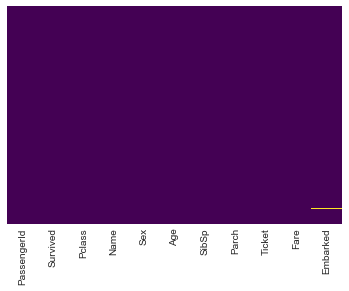

In [48]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [46]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [47]:
train.drop('Cabin',axis=1,inplace=True)

In [49]:
train.dropna(inplace=True)

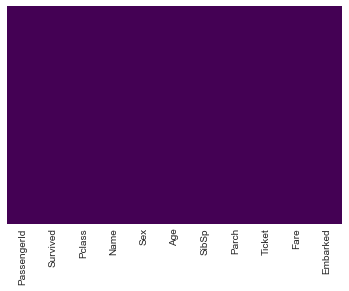

In [50]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [65]:
sex = pd.get_dummies(train['Sex'],drop_first=True) # just keep one binary column


In [68]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [62]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [72]:
embarked = pd.get_dummies(train['Embarked'],drop_first=True) # just keep one binary column

In [73]:
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [75]:
train = pd.concat([train,sex,embarked],axis=1)

In [76]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [78]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [79]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [80]:
train.drop('PassengerId',axis=1,inplace=True)

In [82]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [83]:
trainready = train.copy()

In [123]:
trainready.to_csv('trainready')

In [125]:
#pd.read_csv('trainready')

# Train model

In [126]:
from sklearn.model_selection import train_test_split

In [128]:
X = trainready.drop('Survived',axis=1)
y = trainready['Survived']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

In [156]:
from sklearn.linear_model import LogisticRegression
logmod = LogisticRegression(verbose=1)

In [157]:
logmod.fit(X_train,y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=1, warm_start=False)

In [158]:
predictions = logmod.predict(X_test)

In [159]:
from sklearn.metrics import classification_report, confusion_matrix

In [160]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [164]:
68/104

0.6538461538461539

In [161]:
confusion_matrix(y_test,predictions)

array([[148,  15],
       [ 36,  68]])

In [144]:
y_test.value_counts()

0    163
1    104
Name: Survived, dtype: int64

In [145]:
y_train.value_counts()

0    386
1    236
Name: Survived, dtype: int64

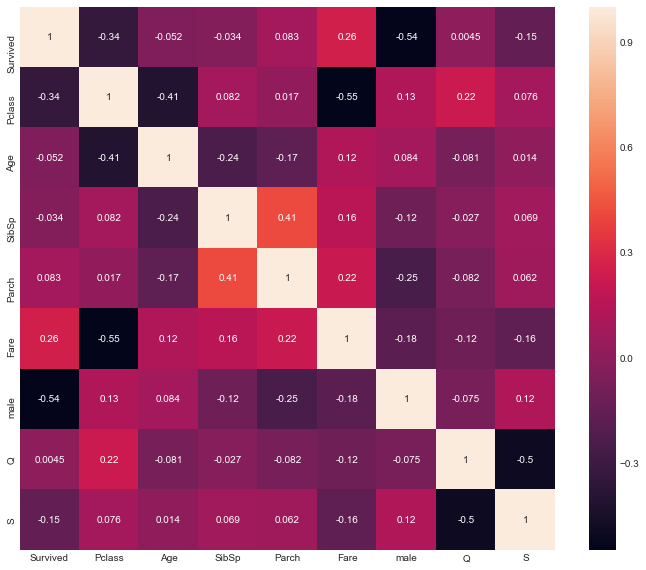

In [153]:
plt.figure(figsize=(12,10))
sns.heatmap(trainready.corr(),annot=True)

In [167]:
pclass = pd.get_dummies(trainready['Pclass'],drop_first=True)



In [170]:
trainready2 = pd.concat([trainready,pclass],axis=1)

In [172]:
trainready2.drop('Pclass',axis=1,inplace=True)

In [173]:
X2 = trainready2.drop('Survived',axis=1)
y2 = trainready2['Survived']

In [174]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.30,random_state=101)

In [175]:
logmod2 = LogisticRegression()

In [176]:
logmod2.fit(X2_train,y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [178]:
predictions2 = logmod2.predict(X2_test)

In [193]:
print(classification_report(y2_test,predictions2,digits=3))

             precision    recall  f1-score   support

          0      0.806     0.920     0.860       163
          1      0.840     0.654     0.735       104

avg / total      0.819     0.816     0.811       267



In [217]:
len(predictions2)

267

In [220]:
sum(y2_test[y2_test==1])

104

In [225]:
len(y2_test)-sum(y2_test[y2_test==1])

163

In [181]:
confusion_matrix(y2_test,predictions2)

array([[150,  13],
       [ 36,  68]])

|  |observed 0|observed 1||
|-|-|-|-|
|**predicted 0**| 150 (TN)|  13 (FN)|163|
|**predicted 1**| 36  (FP)|  68 (TP)|104|
||186|81|267|


In [208]:
died_p = 150/(150+36) # TP / (TP + FP) 
died_p

0.8064516129032258

In [209]:
died_r = 150/163 # TP / (TP + FN)
died_r

0.9202453987730062

In [212]:
livd_p = 68 / (68+13) # TP / (TP +  )
livd_p

0.8395061728395061

In [213]:
livd_r = 68 / (68+36)
livd_r

0.6538461538461539

In [215]:
died_f1 = 2 * ((died_p*died_r)/(died_p+died_r))
died_f1

0.8595988538681948

In [216]:
livd_f1 = 2 * ((livd_p*livd_r)/(livd_p+livd_r))
livd_f1

0.7351351351351351

In [226]:
# (a+b/2)-(2b/2)  -> a - b / 2 is the hyp of the inscribed right tri

In [ ]:
# H = 2ab/(a+b)
# r = (a+b) / 2
# r - H is one leg of the inscribed right tri
# 
#  (a-b)^2 / 2(a+b)


In [ ]:
# x = sqrt(G^2 - H^2)

# x = sqrt( a*b - ((2*a*b)/(a+b))^2 )is the opposite leg of the iscr tri
#
# Simplifies to:
#
#  G * (a-b) / (a+b)
#
# sqrt(a*b) * (a-b) / (a+b)

# Integer means

In [5]:
def isint(n):
    frac, num = np.modf(n)
    return n == num

In [6]:
# Let's try and find all integral/natural q, a, g, h using pythagorean triplets a,b,c
for m in range(1,1000):
    for t in [ (n**2-m**2,(2*n*m),(n**2+m**2)) for n in range(m+1,1001) ]:
        #q = np.sqrt(t[0]**2+t[1]**2)
        q = t[2]                            # quadratic mean
        a = (t[0]+t[1]) / 2                 # arithmetic mean
        g = np.sqrt(t[0]*t[1])              # geometric mean
        h = 2*(t[0]*t[1])/(t[0]+t[1])       # harmonic mean
        if isint(q) and isint(a) and isint(g) and isint(h):
            print ('{0} -> Q={1:10.3f} A={2:10.3f}, G={3:10.3f}, H={4:10.3f}'.format(t[:2],q,a,g,h))
        elif sum(isint([q,a,g,h])) > 2:
            print ('CLOSE {0} -> Q={1:10.3f} A={2:10.3f}, G={3:10.3f}, H={4:10.3f}'.format(t[:2],q,a,g,h))

# Theorem:
# When CLOSE (at least 3 of Q, A, H, G are natural), G is always fractional
# Q (quadratic mean) = c 

    

CLOSE (392, 294) -> Q=   490.000 A=   343.000, G=   339.482, H=   336.000
CLOSE (3920, 882) -> Q=  4018.000 A=  2401.000, G=  1859.419, H=  1440.000
CLOSE (588, 784) -> Q=   980.000 A=   686.000, G=   678.964, H=   672.000
CLOSE (1568, 1176) -> Q=  1960.000 A=  1372.000, G=  1357.928, H=  1344.000
CLOSE (15680, 3528) -> Q= 16072.000 A=  9604.000, G=  7437.677, H=  5760.000
CLOSE (6936, 2890) -> Q=  7514.000 A=  4913.000, G=  4477.169, H=  4080.000
CLOSE (3528, 2646) -> Q=  4410.000 A=  3087.000, G=  3055.338, H=  3024.000
CLOSE (35280, 7938) -> Q= 36162.000 A= 21609.000, G= 16734.773, H= 12960.000
CLOSE (2352, 3136) -> Q=  3920.000 A=  2744.000, G=  2715.856, H=  2688.000
CLOSE (6272, 4704) -> Q=  7840.000 A=  5488.000, G=  5431.711, H=  5376.000
CLOSE (62720, 14112) -> Q= 64288.000 A= 38416.000, G= 29750.708, H= 23040.000
CLOSE (46128, 13454) -> Q= 48050.000 A= 29791.000, G= 24911.967, H= 20832.000
CLOSE (27744, 11560) -> Q= 30056.000 A= 19652.000, G= 17908.675, H= 16320.000
CLOSE (98

CLOSE (480200, 360150) -> Q=600250.000 A=420175.000, G=415865.399, H=411600.000
CLOSE (268960, 282408) -> Q=389992.000 A=275684.000, G=275601.988, H=275520.000
CLOSE (190512, 254016) -> Q=317520.000 A=222264.000, G=219984.309, H=217728.000
CLOSE (508032, 381024) -> Q=635040.000 A=444528.000, G=439968.618, H=435456.000
CLOSE (536648, 402486) -> Q=670810.000 A=469567.000, G=464750.801, H=459984.000
CLOSE (212268, 283024) -> Q=353780.000 A=247646.000, G=245105.974, H=242592.000
CLOSE (566048, 424536) -> Q=707560.000 A=495292.000, G=490211.948, H=485184.000
CLOSE (887152, 522786) -> Q=1029730.000 A=704969.000, G=681021.766, H=657888.000
CLOSE (92480, 221952) -> Q=240448.000 A=157216.000, G=143269.400, H=130560.000
CLOSE (596232, 447174) -> Q=745290.000 A=521703.000, G=516352.059, H=511056.000
CLOSE (135424, 253920) -> Q=287776.000 A=194672.000, G=185436.949, H=176640.000
CLOSE (44100, 196000) -> Q=200900.000 A=120050.000, G= 92970.963, H= 72000.000
CLOSE (235200, 313600) -> Q=392000.000 A=

In [12]:
# Let's try and find all integral/natural q, a, g, h using min/max span
for m in range(2,2000,2):
    for t in [ (m,n) for n in range(int(m/2+1),m+1) ]:
        q = np.sqrt(t[0]**2+t[1]**2)        # quadratic mean
        a = (t[0]+t[1]) / 2                 # arithmetic mean
        g = np.sqrt(t[0]*t[1])              # geometric mean
        h = 2*(t[0]*t[1])/(t[0]+t[1])       # harmonic mean
        if sum(isint([q,a,g,h])) > 2 and isint(g):
            pass # print ('CLOSE {0} -> Q={1:10.6f} A={2:10.6f}, G={3:10.6f}, H={4:10.6f}'.format(t[:2],q,a,g,h))
        elif sum(isint([q,a,g,h])) > 2 and isint(q):
            pass # print ('TRIP? {0} -> Q={1:10.6f} A={2:10.6f}, G={3:10.6f}, H={4:10.6f}'.format(t[:2],q,a,g,h))
        elif isint(g) and isint(q):
            print ('WOOT {0} -> Q={1:10.6f} A={2:10.6f}, G={3:10.6f}, H={4:10.6f}'.format(t[:2],q,a,g,h))
            
# Theorem:
# if A, H, G are natural then Q is fractional
# if A, H, Q are natural then G is fractional
# Seems like G and Q are never simultaneously natural
#
# can G = Q?  a,b > 0, a <> b : no
#  G = sqrt(a*b), Q = sqrt(a^2+b^2)
#  a * b = a^2 + b^2
#  a = (a^2)/b + b , b=1
#  a = a^2 + 1
#  a - a^2 = 1 : false
#
# can G and Q both be natural? False
#  b = a+c, c>0, c is natural, Q > H (from above)
#  Q(a,a+c) - G(a,a+c) = natural
#  sqrt(a^2+(a+c)^2) - sqrt(a*(a+c)) = natural
#  c = i/2 * (sqrt(3) * a + i * a) is imaginary when 0, c must be natural at zero
# for c to be natural when greater than zero.

# When A and H are natural:
# When Q is fractional and G natural and a=b
# When G is fractional and Q natural and a^2+b^2=Q^2



In [9]:
np.sqrt(84**2+112**2)

140.0

In [327]:
(6985449+1)/2

3492725.0

In [328]:
isint((6985449+1)/2)

True

In [332]:
3492725*2-1

6985449

In [343]:
240**2

57600